# 1. Concept Question

# 1.1 Support Vector Machines: 3 points
As shown in Figure 1, there are 4 training samples in a 2-dimensional space. x1 = (0, 0) and x2 = (2, 2) are being positive, while x3 = (h, 1) and x4 = (0, 3) are being negative. h is a parameter whose value falls in the range of [0, 3].

1. How large can h ≥ 0 be so the training examples are still linearly separable?

The training examples will be linearly separable as long as the value of h is less than or equal to 2. This is because the line that separates the positive and negative samples can be drawn between the points (0, 0) and (2, 2) for h values up to 2, ensuring linear separability

2. Will the direction of the maximum margin decision boundary change as a function of h when the samples are separable? Explain your answer with one sentence.

Yes, the direction of the maximum margin decision boundary will change as a function of h when the samples are separable. As h increases, the position of the negative sample x3 changes, affecting the orientation of the decision boundary.

3. What will be the margin obtained by the maximum margin boundary as a function of h? Note that the margin as a function of h is actually a linear function.


The margin obtained by the maximum margin boundary as a function of h will be equal to the distance from the decision surface to the closest data point. This margin will be a linear function of h, and it will increase as h increases.

# 1.2 Neural Nets: 2 points
Consider a neural net for a binary classification which has one hidden layer as shown in Figure 2. We use a linear activation function h(z) = cz at hidden units and a sigmoid activation function g(z) = 1/1+e−z at the output unit to learn the function for P(y = 1|x,w), where x = (x1, x2) and w = (w1,w2, . . . ,w9).

1. What is the output P(y = 1|x,w) from the above neural net? Express it in terms of xi, c and weights wi.

To create a probability, we will pass z through the sigmoid function.
The sigmoid function is additionally called the logistic function and provides logistic regression its name.
The sigmoid function should take a true value and maps it to the range [0,1]. It is nearly linear around 0 but outlier values get changed toward 0 or 1.
The bias term, also called the intercept, is another real  that’s added to the weighted inputs.
P(y = 1|x) is the probability that the function has a positive sentiment. 

Expression: g(w7 + cw8w1 + cw8w3x4 + cw8w5x2 + cw9w2 + cw9w4x4 + cw9w6x2)


2. Is it true that any multi-layered neural net with linear activation functions at hidden layers can be represented as a neural net without any hidden layer? Briefly explain your answer.

Yes. If linear activation functions are used for all the hidden layers, the output from hidden layers will be written as a linear combination of input features.
Since this intermediate output serves as input for the final output layer, we can always find an equivalent neural net that does not have any hidden layer.

# 1.3 Bayesian Rules and Bayesian Networks: 3 points

1. Consider the Bayesian network shown in Figure 3. All the variables are boolean. Write the expression for the joint likelihood of the network in its factored form (1 points).

P(a,b,c,d,e,f,g) = P(a) * P(g) * P(b∣a) * P(c∣b) * P(f∣g) * P(d∣c,f) * P(e∣d)

2. Suppose you are given the following set of data shown in Figure 4 with three Boolean input variables a, b, and c, and a single Boolean output variable K. Assume we are using a Naive Bayesian classifier to predict the value of K from the values of the other variables. What is P(K = 1|a = 1, b = 1, c = 0), and P(K = 0|a = 1, b = 1)? (2 points)

 P(K = 1|a = 1, b = 1, c = 0) = 0.44
 P(K = 0|a = 1, b = 1) = 0.67

# 2.  Product Classification
In this exercise, we’ll delve into a dataset from the Otto Classification Challenge, a competition hosted by Kaggle in 2015 
1. The Otto Group stands as a global e-commerce giant, boasting subsidiaries across over 20 countries. This includes renowned brands like Crate & Barrel (USA), Otto.de (Germany), and 3 Suisses (France). Given their expansive daily sales volume worldwide, a systematic product performance analysis becomes vital. However, a challenge arises as their expansive global setup often leads to identical products being categorized differently. Thus, the depth and quality of product analysis largely hinge on the precision of product grouping. Efficient classification paves the way for deeper insights into their product assortment.

https://www.kaggle.com/c/otto-group-product-classification-challenge


The provided dataset comprises 93 features spanning over 200,000 products. The crux of this exercise is to construct various predictive models capable of discerning primary product categories. Utilizing the sklearn library, you’ll implement and juxtapose the efficacy of diverse algorithms discussed in our sessions. The dataset, named “otto.csv”, is accessible for download via MyLS.

# 2.1 Data Loading and Preprocessing: 1 points
1. Load the data;
2. The target variable in this dataset is already in a categorical format suitable for multi-class classification. If it were in a string format and needed numerical encoding, you could use label encoding;
3. Extract features and target;
4. Standardize the feature values;
5. Randomly split the data into 70% training and 30% testing.

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the data
data = pd.read_csv("otto.csv")

# Extract features and target
X = data.drop(['id', 'target'], axis=1) 
y = data['target']


# Standardize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Randomly split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


# 2.2 Classifier Construction and Evaluation: 4 points
In this question, you will be developing the following different predictive models with sklearn.
1. Logistic Regression;
2. Neural Network (Multi Layer Perceptron);
3. Naive Bayes;
4. Linear SVM

1. Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Create and train the Logistic Regression model with increased max_iter
logistic_model = LogisticRegression(max_iter=1000)  
logistic_model.fit(X_train, y_train)

# Predictions
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate F1 score
f1_logistic = f1_score(y_test, y_pred_logistic, average='weighted')
print("Logistic Regression F1 Score:", f1_logistic)

Logistic Regression F1 Score: 0.7467917580055179


2. Neural Network (Multi Layer Perceptron)

In [7]:
from sklearn.neural_network import MLPClassifier

# Create and train the Neural Network model with increased max_iter
mlp_model = MLPClassifier(max_iter=1000)  
mlp_model.fit(X_train, y_train)

# Predictions
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate F1 score
f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')
print("Neural Network F1 Score:", f1_mlp)


Neural Network F1 Score: 0.7746074152345034


3. Naive Bayes

In [8]:
from sklearn.naive_bayes import GaussianNB

# Create and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate F1 score
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')
print("Naive Bayes F1 Score:", f1_nb)


Naive Bayes F1 Score: 0.6229277915313866


4. Linear SVM

In [9]:
from sklearn.svm import SVC

# Create and train the Linear SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate F1 score
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
print("Linear SVM F1 Score:", f1_svm)


Linear SVM F1 Score: 0.7441383282923569


# 2.3 Performance Comparison: 1 point
To evaluate the performance of different methods, please compute the F1 measure of each algorithm and conclude which method works best in your experiment.

In [10]:
# F1 Scores
print("Logistic Regression F1 Score:", f1_logistic)
print("Neural Network F1 Score:", f1_mlp)
print("Naive Bayes F1 Score:", f1_nb)
print("Linear SVM F1 Score:", f1_svm)

# Conclusion
best_method = max(f1_logistic, f1_mlp, f1_nb, f1_svm)

if best_method == f1_logistic:
    print("Logistic Regression is the best performing method.")
elif best_method == f1_mlp:
    print("Neural Network (Multi-Layer Perceptron) is the best performing method.")
elif best_method == f1_nb:
    print("Naive Bayes is the best performing method.")
else:
    print("Linear SVM is the best performing method.")


Logistic Regression F1 Score: 0.7467917580055179
Neural Network F1 Score: 0.7746074152345034
Naive Bayes F1 Score: 0.6229277915313866
Linear SVM F1 Score: 0.7441383282923569
Neural Network (Multi-Layer Perceptron) is the best performing method.


# 3. COVID Diagnosis 
The 2019 coronavirus outbreak (COVID-19) has brought forward several distinguishing characteristics. Although its diagnosis is validated through polymerase chain reaction (PCR), patients inflicted with pneumonia due to the virus might exhibit certain patterns on chest X-rays and CT scans that aren’t immediately obvious to the naked eye. In the early phases of 2020, researchers shed light on the clinical and paraclinical aspects of COVID-19, noting that many patients showed irregularities in chest CT scans, often affecting both lungs. In the realm of computer vision, Convolutional Neural Networks (CNNs) have marked a revolutionary stride. Surpassing traditional methods, they’ve set new performance benchmarks. These networks have consistently demonstrated their efficacy across varied real-world scenarios, including image categorization. Your mission here is to harness these X-ray visuals to craft a CNN using Keras, aiming to diagnose and interpret the infection. Such a tool could empower doctors to make more informed decisions while awaiting a radiologist’s review, offering them a virtual second opinion to corroborate their evaluation of a patient.

The provided dataset in MyLS encompasses 188 chest X-ray images, capturing both COVID-19 affected patients and healthy individuals. This dataset is bifurcated into training and testing subsets. Each subset is further divided into two categories: “NORMAL” and “PNEUMONIA”, intended for model development and assessment, respectively. To bring this predictor to life, the outlined steps in this assignment need to be followed.

1. Image pre-processing (2 points). Image pre-processing stands as a foundational and pivotal step when working with image data. In this phase, it’s essential to resize all images to our target dimensions (64x64) and normalize them by dividing by 255. Based on the computational capacity available, images can be represented using all three RGB channels or just one channel, signifying grayscale. Optionally, further data augmentation can be employed to enhance the dataset’s richness. Relevant functionalities can be found in the Keras’ ImageDataGenerator module 2. • ImageDataGenerator • flow from directory A sample setting of converting the image is shown below. Explore your own for best result. from tensorflow.keras.preprocessing.image import ImageDataGenerator datagen=ImageDataGenerator( zoom_range=0.2, # Zooming rate of the image horizontal_flip=True, # Make a horizontal copy rescale=1.0/255.0, # Normalize the new images width_shift_range=0.10, # Percentage of width shifting height_shift_range=0.10, # Percentage of height shifting)

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator https://machinelearningmastery.com/how-to-reduce-overfitting-with-dropout-regularization-in-keras/ https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/




In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up ImageDataGenerator for data augmentation and normalization
datagen = ImageDataGenerator(
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1.0/255.0,
    width_shift_range=0.10,
    height_shift_range=0.10
)

# Set the target dimensions
target_dimensions = (64, 64)

# Load and preprocess training data
train_generator = datagen.flow_from_directory(
    '/Users/aryanpatel/Desktop/Fall 2023/CP-640-B - Machine Learning/Assignment 2/xray_dataset_covid19/train',
    target_size=target_dimensions,
    batch_size=32,
    class_mode='binary'
)

# Load and preprocess testing data
test_generator = datagen.flow_from_directory(
    '/Users/aryanpatel/Desktop/Fall 2023/CP-640-B - Machine Learning/Assignment 2/xray_dataset_covid19/test',
    target_size=target_dimensions,
    batch_size=32,
    class_mode='binary'
)


Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


2. Model building (3 points).
You have the flexibility to craft our convolution layers. Consider the architecture depicted in Figure 3 as an illustration. Here, the design commences with a pair of convolutional layers, succeeded by two maxpooling layers. Post flattening the output, it integrates a fully connected dense layer, culminating with an output layer. Each layer employs the Relu activation function, with the exception of the final output layer which utilizes the sigmoid function. To further improve the predictor’s performance, you can also optionally add a tensorflow.keras.callbacks module. Callback is a strategy to reduce over fitting and save time. For example, you can use EarlyStopping if the accuracy does not improve for certain iterations. This can be implemented as below. from tensorflow.keras.callbacks import EarlyStopping earlystop=EarlyStopping(patience=6) You can also optionally add dropout layers to further reduce overfitting 3 and introduce Adam to optimize the SGD process in learning parameters4.

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Create a Sequential model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add max pooling layers
model.add(MaxPooling2D((2, 2)))
model.add(MaxPooling2D((2, 2)))

# Flatten the output
model.add(Flatten())

# Add a fully connected dense layer
model.add(Dense(128, activation='relu'))

# Optionally, add dropout layer to reduce overfitting
model.add(Dropout(0.5))

# Add the output layer
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

3. Model evaluation (3 points). 
To gauge the proficiency of our predictor, you are tasked with employing evaluation metrics such as Accuracy and Losses (Binary Cross Entropy), tracking their evolution over 20 epochs. Further, to gain deeper insights into the learning trajectory, it’s pivotal to display outcomes for both training and testing datasets. Submissions should incorporate visualizations akin to those in Figure 5, illustrating Accuracy and Losses. Concluding, you’ll furnish an analysis rooted in your experimental findings, delving into discussions around potential overfitting.

Epoch 1/20
5/5 [==============================] - 3s 585ms/step - loss: 0.7642 - accuracy: 0.5608 - val_loss: 0.6414 - val_accuracy: 0.5000
Epoch 2/20
5/5 [==============================] - 2s 529ms/step - loss: 0.6379 - accuracy: 0.6284 - val_loss: 0.5963 - val_accuracy: 0.6750
Epoch 3/20
5/5 [==============================] - 2s 515ms/step - loss: 0.6335 - accuracy: 0.6486 - val_loss: 0.4898 - val_accuracy: 0.9250
Epoch 4/20
5/5 [==============================] - 2s 492ms/step - loss: 0.5947 - accuracy: 0.6892 - val_loss: 0.4300 - val_accuracy: 0.8250
Epoch 5/20
5/5 [==============================] - 2s 529ms/step - loss: 0.5697 - accuracy: 0.6959 - val_loss: 0.3371 - val_accuracy: 0.9250
Epoch 6/20
5/5 [==============================] - 2s 493ms/step - loss: 0.4594 - accuracy: 0.8176 - val_loss: 0.2241 - val_accuracy: 0.9500
Epoch 7/20
5/5 [==============================] - 2s 521ms/step - loss: 0.3888 - accuracy: 0.8446 - val_loss: 0.2020 - val_accuracy: 0.9000
Epoch 8/20
5/5 [====

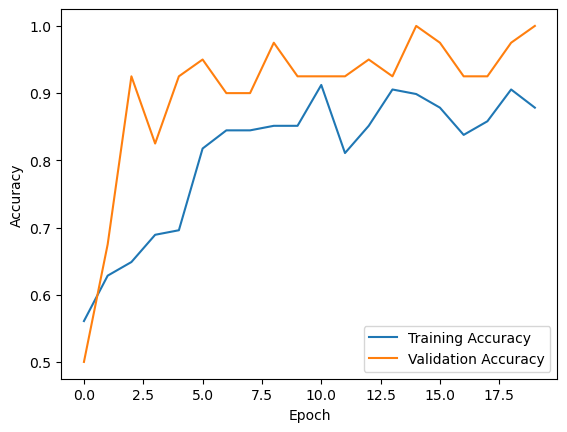

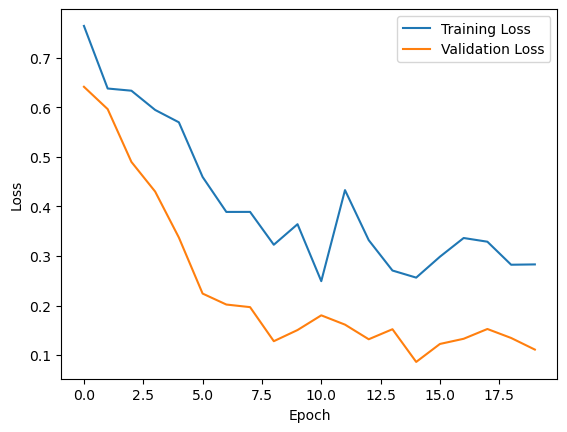

In [3]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Set up EarlyStopping callback
earlystop = EarlyStopping(patience=6)

# Train the model
history = model.fit(train_generator, epochs=20, validation_data=test_generator, callbacks=[earlystop])

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()